# 01 - Exploratory Data Analysis

Understand the unified training data and record preprocessing rules to implement later.


In [6]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

sns.set_theme(style='whitegrid')
pd.set_option('display.max_columns', None)

# --- Fixed path logic ---

cwd = Path.cwd()
print("CWD in notebook:", cwd)

candidate_paths = [
    cwd / "data" / "raw" / "training" / "training_all_cities_until_2024_06_30.parquet",
    cwd.parent / "data" / "raw" / "training" / "training_all_cities_until_2024_06_30.parquet",
]

DATA_PATH = None
for path in candidate_paths:
    print("Checking:", path.resolve(), "exists:", path.exists())
    if path.exists():
        DATA_PATH = path
        break

if DATA_PATH is None:
    raise FileNotFoundError(
        "training_all_cities_until_2024_06_30.parquet not found in expected locations.\n"
        f"CWD: {cwd}\n"
        "Make sure you started Jupyter from the smogguard_pk project folder."
    )

print("Using data file:", DATA_PATH.resolve())
df = pd.read_parquet(DATA_PATH)



CWD in notebook: /Users/faisalimran/Desktop/ML_PROJ/smogguard_pk/notebooks
Checking: /Users/faisalimran/Desktop/ML_PROJ/smogguard_pk/notebooks/data/raw/training/training_all_cities_until_2024_06_30.parquet exists: False
Checking: /Users/faisalimran/Desktop/ML_PROJ/smogguard_pk/data/raw/training/training_all_cities_until_2024_06_30.parquet exists: True
Using data file: /Users/faisalimran/Desktop/ML_PROJ/smogguard_pk/data/raw/training/training_all_cities_until_2024_06_30.parquet


In [7]:
# Ensure correct dtypes
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df = df.dropna(subset=['datetime'])
df['datetime'] = df['datetime'].dt.tz_localize(None)
df['city'] = df['city'].astype(str)

non_datetime_city = df.columns.difference(['datetime', 'city'])
df[non_datetime_city] = df[non_datetime_city].apply(pd.to_numeric, errors='coerce')

print('Dtypes after enforcement:')
print(df.dtypes)
print('Datetime dtype:', df['datetime'].dtype)
print('City dtype:', df['city'].dtype)


Dtypes after enforcement:
datetime                datetime64[ns]
main_aqi                         int64
components_co                  float64
components_no                  float64
components_no2                 float64
components_o3                  float64
components_so2                 float64
components_pm2_5               float64
components_pm10                float64
components_nh3                 float64
temperature_2m                 float64
relative_humidity_2m           float64
dew_point_2m                   float64
precipitation                  float64
surface_pressure               float64
wind_speed_10m                 float64
wind_direction_10m             float64
shortwave_radiation              int64
city                            object
dtype: object
Datetime dtype: datetime64[ns]
City dtype: object


In [8]:
display(df.head())
df.info()
display(df.describe().T)
display(df['city'].value_counts())
display(df['main_aqi'].value_counts())


,datetime,main_aqi,components_co,components_no,components_no2,components_o3,components_so2,components_pm2_5,components_pm10,components_nh3,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,surface_pressure,wind_speed_10m,wind_direction_10m,shortwave_radiation,city
0,2021-08-24 00:00:00,5,1228.33,0.00,27.76,40.41,6.02,66.96,87.07,14.69,29.7,55.0,19.7,0.0,943.4,10.5,74.0,0,Islamabad
1,2021-08-24 01:00:00,5,1134.87,0.00,24.33,46.49,6.20,64.50,82.37,14.57,29.4,56.0,19.7,0.0,943.2,10.8,92.0,0,Islamabad
2,2021-08-24 02:00:00,5,1361.85,0.94,39.41,30.76,6.91,64.21,80.38,16.21,28.9,58.0,19.8,0.0,943.0,10.1,107.0,0,Islamabad
3,2021-08-24 03:00:00,5,1682.28,8.38,51.41,27.18,9.06,64.75,79.55,17.73,28.4,60.0,19.8,0.0,942.8,10.5,106.0,0,Islamabad
4,2021-08-24 04:00:00,5,1054.76,3.07,27.08,91.55,21.70,59.86,71.18,13.30,28.1,62.0,20.1,0.0,942.9,9.4,97.0,0,Islamabad


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123134 entries, 0 to 123133
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   datetime              123134 non-null  datetime64[ns]
 1   main_aqi              123134 non-null  int64         
 2   components_co         123134 non-null  float64       
 3   components_no         123134 non-null  float64       
 4   components_no2        123134 non-null  float64       
 5   components_o3         123134 non-null  float64       
 6   components_so2        123134 non-null  float64       
 7   components_pm2_5      123134 non-null  float64       
 8   components_pm10       123134 non-null  float64       
 9   components_nh3        123134 non-null  float64       
 10  temperature_2m        123134 non-null  float64       
 11  relative_humidity_2m  123134 non-null  float64       
 12  dew_point_2m          123134 non-null  float64       
 13 

,count,mean,min,25%,50%,75%,max,std
datetime,123134,2023-01-26 05:21:01.844819712,2021-08-24 00:00:00,2022-05-09 12:00:00,2023-01-26 01:00:00,2023-10-15 14:45:00,2024-06-30 23:00:00,NaN
main_aqi,123134.0,4.190581,1.0,3.0,5.0,5.0,5.0,1.040882
components_co,123134.0,2186.407221,150.2,500.68,1134.87,2910.61,27771.0,2566.087874
components_no,123134.0,20.929996,0.0,0.01,0.94,13.64,686.65,49.444928
components_no2,123134.0,50.195095,0.34,9.34,29.47,74.03,833.51,55.752734
components_o3,123134.0,65.635107,0.0,7.51,51.5,100.14,709.53,64.950261
components_so2,123134.0,13.258841,0.16,3.67,8.58,17.41,156.4,14.467669
components_pm2_5,123134.0,117.437541,0.5,28.14,60.685,140.41,1965.05,150.322564
components_pm10,123134.0,162.328957,0.57,56.71,102.14,196.8375,2183.34,174.657101
components_nh3,123134.0,24.704836,0.0,4.43,12.29,30.91,389.1,32.925784


city
Lahore       24646
Islamabad    24622
Karachi      24622
Peshawar     24622
Quetta       24622
Name: count, dtype: int64

main_aqi
5    67074
4    24619
3    20708
2     9300
1     1433
Name: count, dtype: int64

In [9]:
# Missing values
na_counts = df.isna().sum().sort_values(ascending=False)
na_pct = df.isna().mean().sort_values(ascending=False)
display(na_counts)
display(na_pct)


datetime                0
temperature_2m          0
shortwave_radiation     0
wind_direction_10m      0
wind_speed_10m          0
surface_pressure        0
precipitation           0
dew_point_2m            0
relative_humidity_2m    0
components_nh3          0
main_aqi                0
components_pm10         0
components_pm2_5        0
components_so2          0
components_o3           0
components_no2          0
components_no           0
components_co           0
city                    0
dtype: int64

datetime                0.0
temperature_2m          0.0
shortwave_radiation     0.0
wind_direction_10m      0.0
wind_speed_10m          0.0
surface_pressure        0.0
precipitation           0.0
dew_point_2m            0.0
relative_humidity_2m    0.0
components_nh3          0.0
main_aqi                0.0
components_pm10         0.0
components_pm2_5        0.0
components_so2          0.0
components_o3           0.0
components_no2          0.0
components_no           0.0
components_co           0.0
city                    0.0
dtype: float64

Preprocessing decision:
- If nulls in numeric features are rare → we will drop those rows in the preprocessing step.
- If a feature has many nulls (e.g. > X%) → we will impute with median during model training using SimpleImputer.
- We will not manually fill values in the raw dataset; imputation will be done in a scikit-learn pipeline.


In [10]:
# Duplicates
dup_all = df.duplicated().sum()
dup_city_time = df.duplicated(subset=['datetime', 'city']).sum()
print('Duplicate rows (exact match):', dup_all)
print('Duplicate rows by datetime + city:', dup_city_time)

df = df.drop_duplicates(subset=['datetime', 'city'])
print('Shape after dropping datetime+city duplicates:', df.shape)


Duplicate rows (exact match): 0
Duplicate rows by datetime + city: 0
Shape after dropping datetime+city duplicates: (123134, 19)


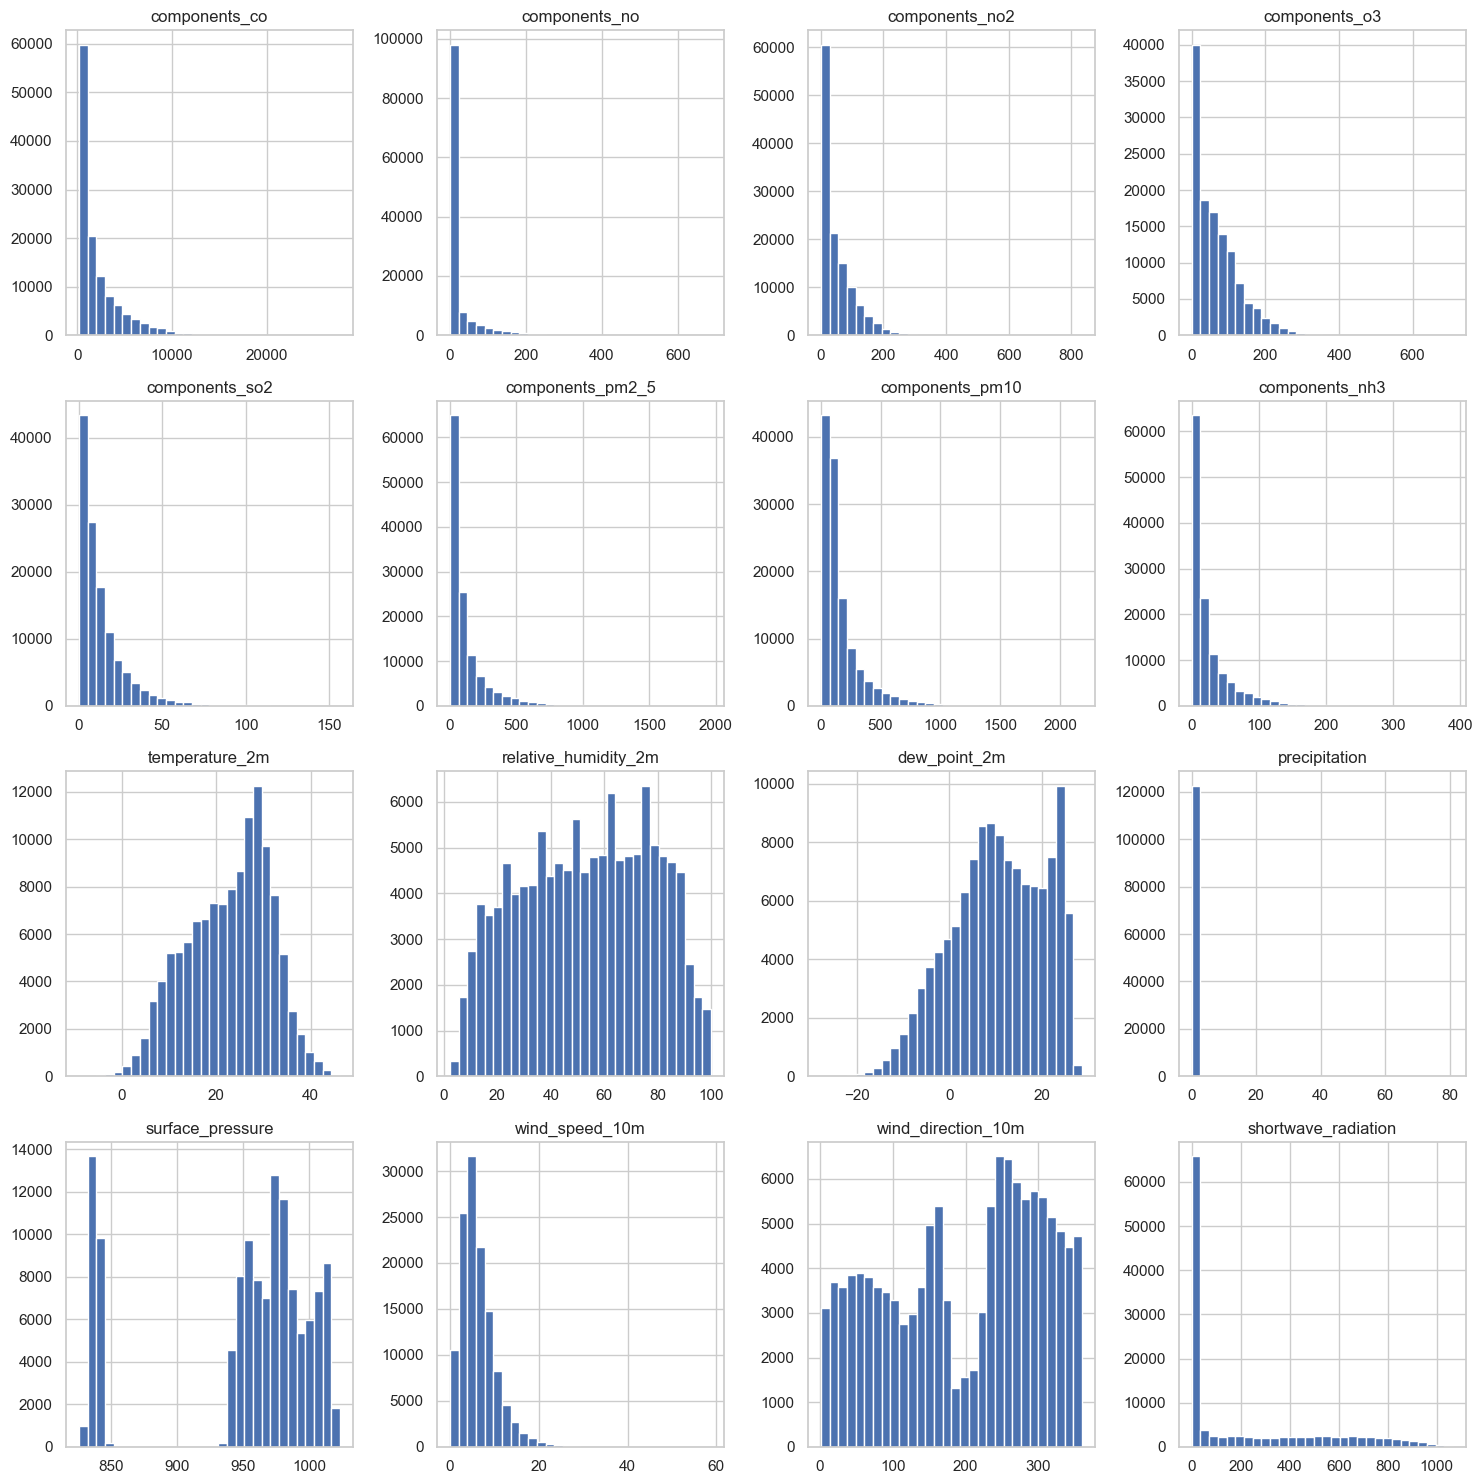

In [11]:
# Distributions
numeric_cols = df.select_dtypes(include='number').columns.tolist()
feature_numeric_cols = [col for col in numeric_cols if col != 'main_aqi']
df[feature_numeric_cols].hist(bins=30, figsize=(15, 15))
plt.tight_layout()
plt.show()


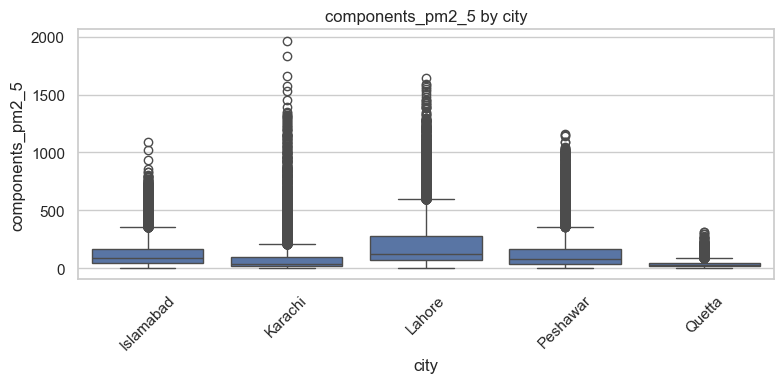

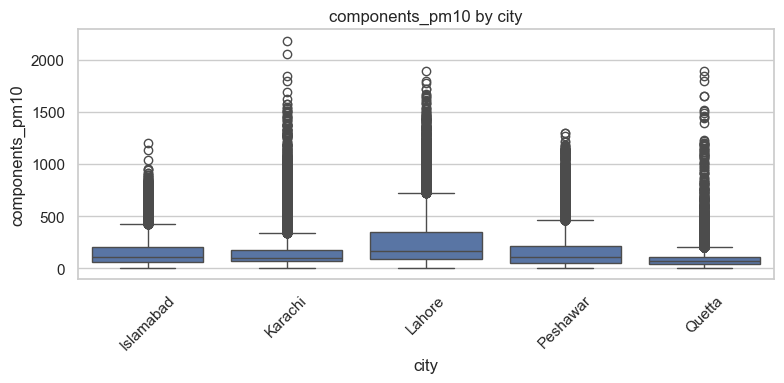

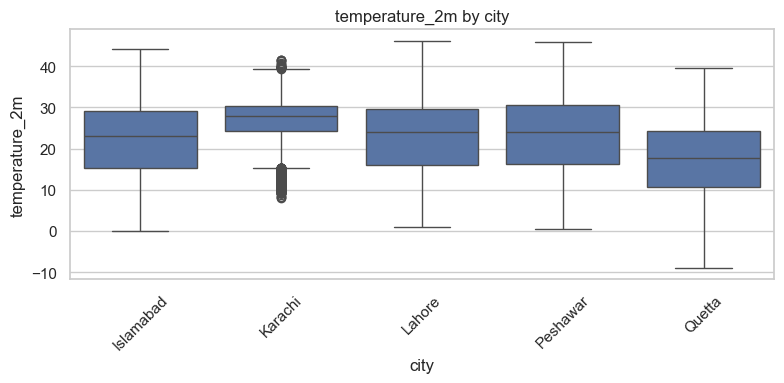

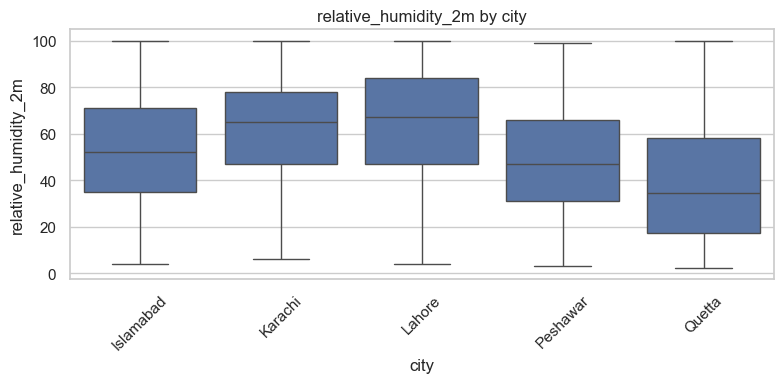

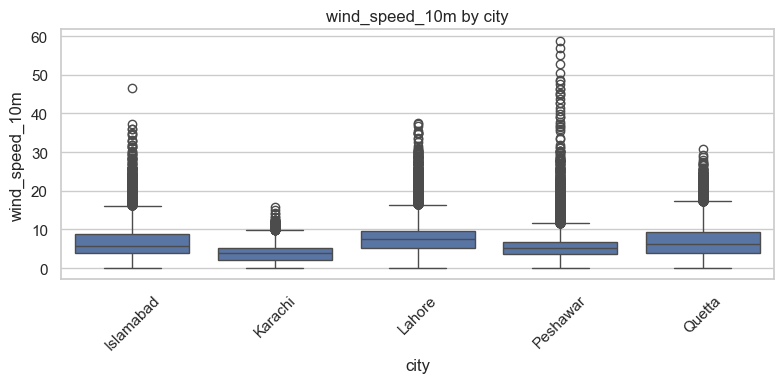

In [12]:
# Boxplots for key features per city
box_features = [
    'components_pm2_5',
    'components_pm10',
    'temperature_2m',
    'relative_humidity_2m',
    'wind_speed_10m',
]
for feat in box_features:
    if feat in df.columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df, x='city', y=feat)
        plt.title(f'{feat} by city')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


Outliers: we expect extreme pollution episodes (e.g., PM spikes). We will keep outliers initially and only consider capping later if modeling requires it.


In [13]:
# Class distribution of main_aqi
display(df['main_aqi'].value_counts(normalize=True))
display(df.groupby('city')['main_aqi'].value_counts(normalize=True))


main_aqi
5    0.544724
4    0.199937
3    0.168175
2    0.075527
1    0.011638
Name: proportion, dtype: float64

city       main_aqi
Islamabad  5           0.651287
           4           0.182154
           3           0.112785
           2           0.049996
           1           0.003777
Karachi    5           0.444318
           3           0.222971
           4           0.218991
           2           0.098652
           1           0.015068
Lahore     5           0.789134
           4           0.125700
           3           0.067313
           2           0.016270
           1           0.001582
Peshawar   5           0.617090
           4           0.196044
           3           0.135082
           2           0.048899
           1           0.002884
Quetta     3           0.302819
           4           0.276866
           5           0.221550
           2           0.163878
           1           0.034887
Name: proportion, dtype: float64

Imbalance handling: if classes are skewed, we will use `class_weight='balanced'` (or similar) in classifiers to compensate.


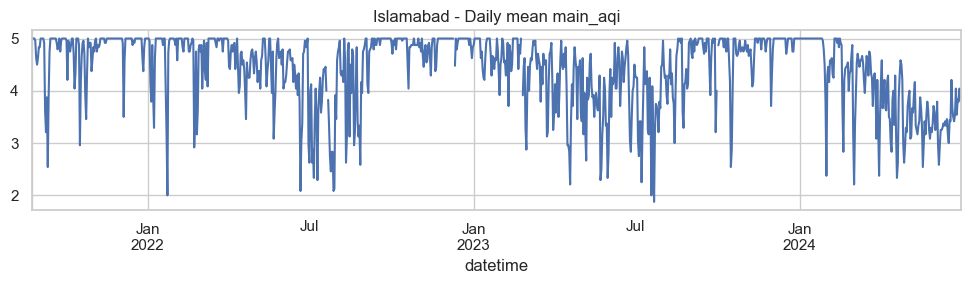

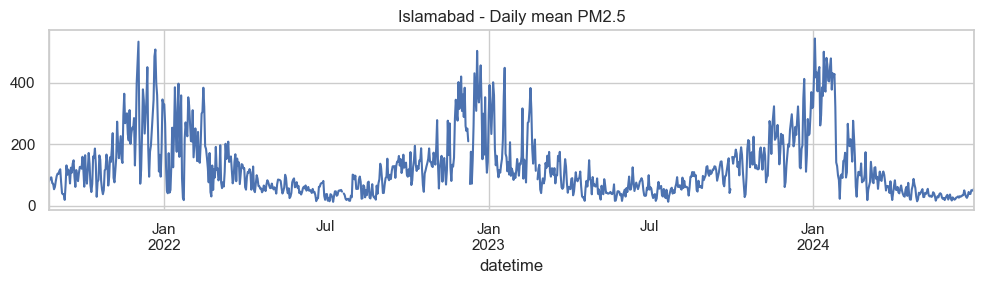

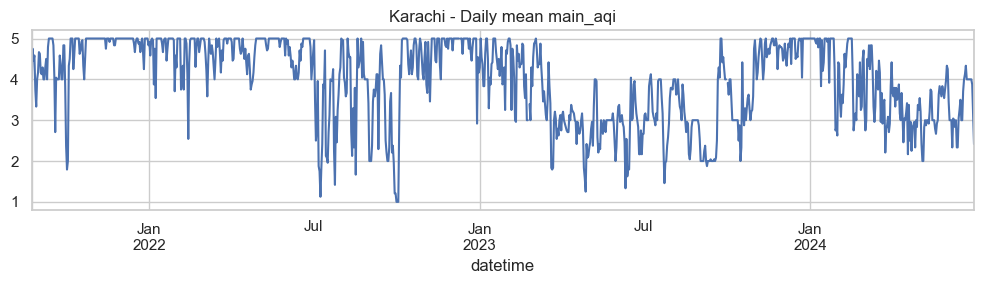

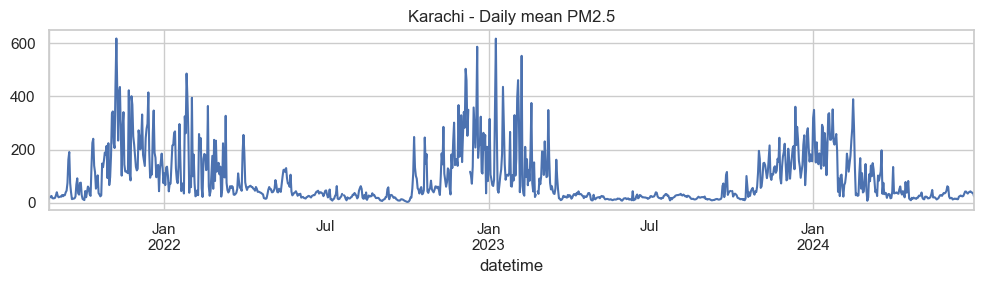

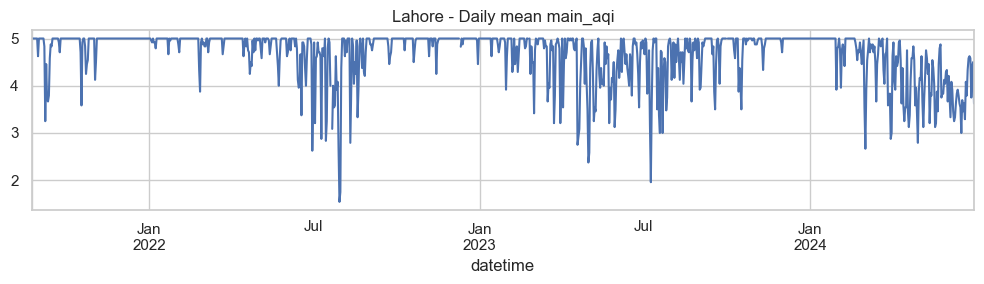

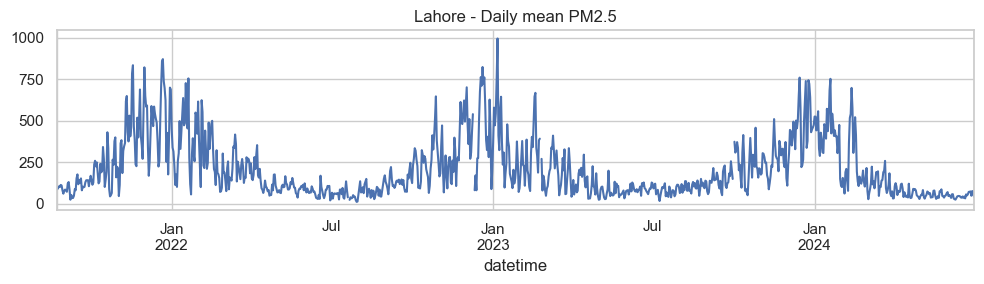

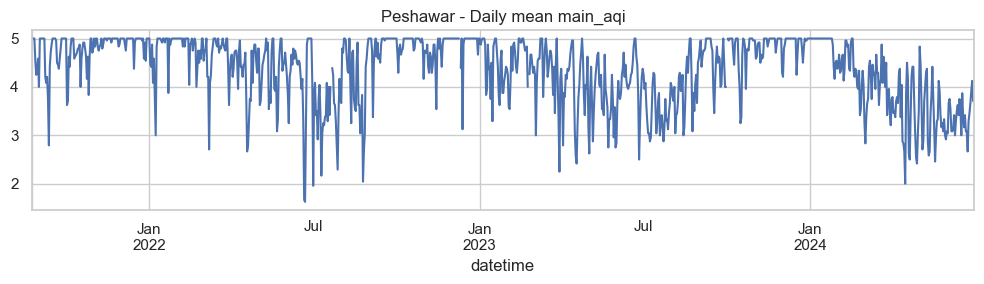

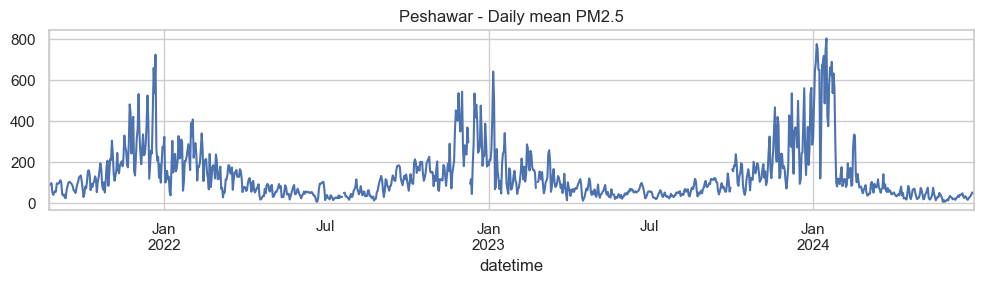

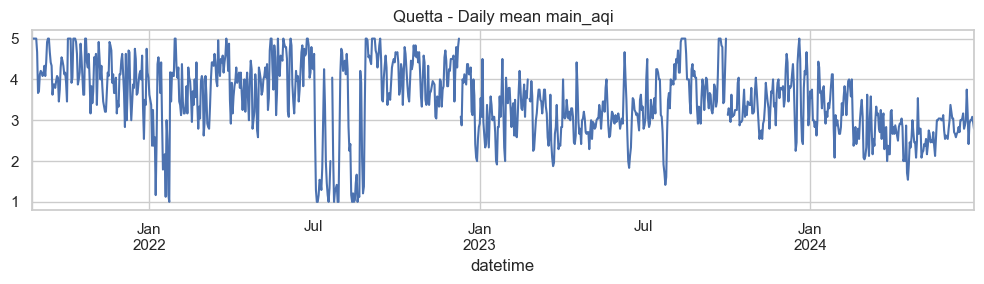

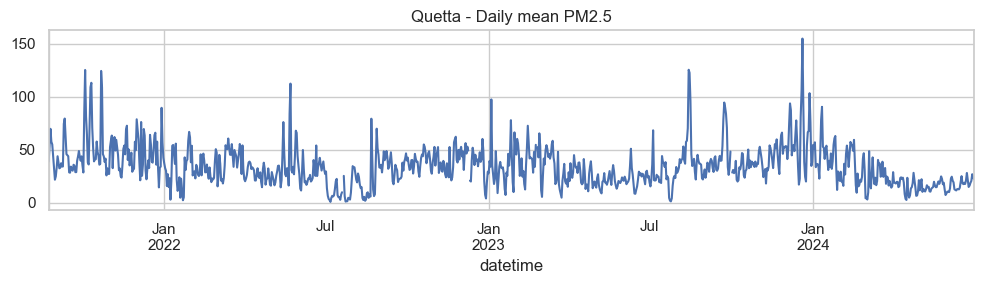

In [14]:
# Time series plots per city (daily mean)
cities = df['city'].unique()
for city in cities:
    subset = df[df['city'] == city].set_index('datetime').sort_index()
    daily_aqi = subset['main_aqi'].resample('D').mean()
    daily_pm25 = subset['components_pm2_5'].resample('D').mean() if 'components_pm2_5' in subset else None

    plt.figure(figsize=(10, 3))
    daily_aqi.plot(title=f'{city} - Daily mean main_aqi')
    plt.tight_layout()
    plt.show()

    if daily_pm25 is not None:
        plt.figure(figsize=(10, 3))
        daily_pm25.plot(title=f'{city} - Daily mean PM2.5')
        plt.tight_layout()
        plt.show()


In [15]:
# Missing timestamps per city
for city in cities:
    sub = df[df['city'] == city].copy()
    sub = sub.sort_values('datetime')
    full_index = pd.date_range(sub['datetime'].min(), sub['datetime'].max(), freq='H')
    missing = full_index.difference(sub['datetime'])
    print(city, 'missing hours:', len(missing))


Islamabad missing hours: 386
Karachi missing hours: 386
Lahore missing hours: 362
Peshawar missing hours: 386
Quetta missing hours: 386


/var/folders/9b/ft46xt2x2yv14x6v95ddt9kw0000gn/T/ipykernel_78104/3264139038.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_index = pd.date_range(sub['datetime'].min(), sub['datetime'].max(), freq='H')


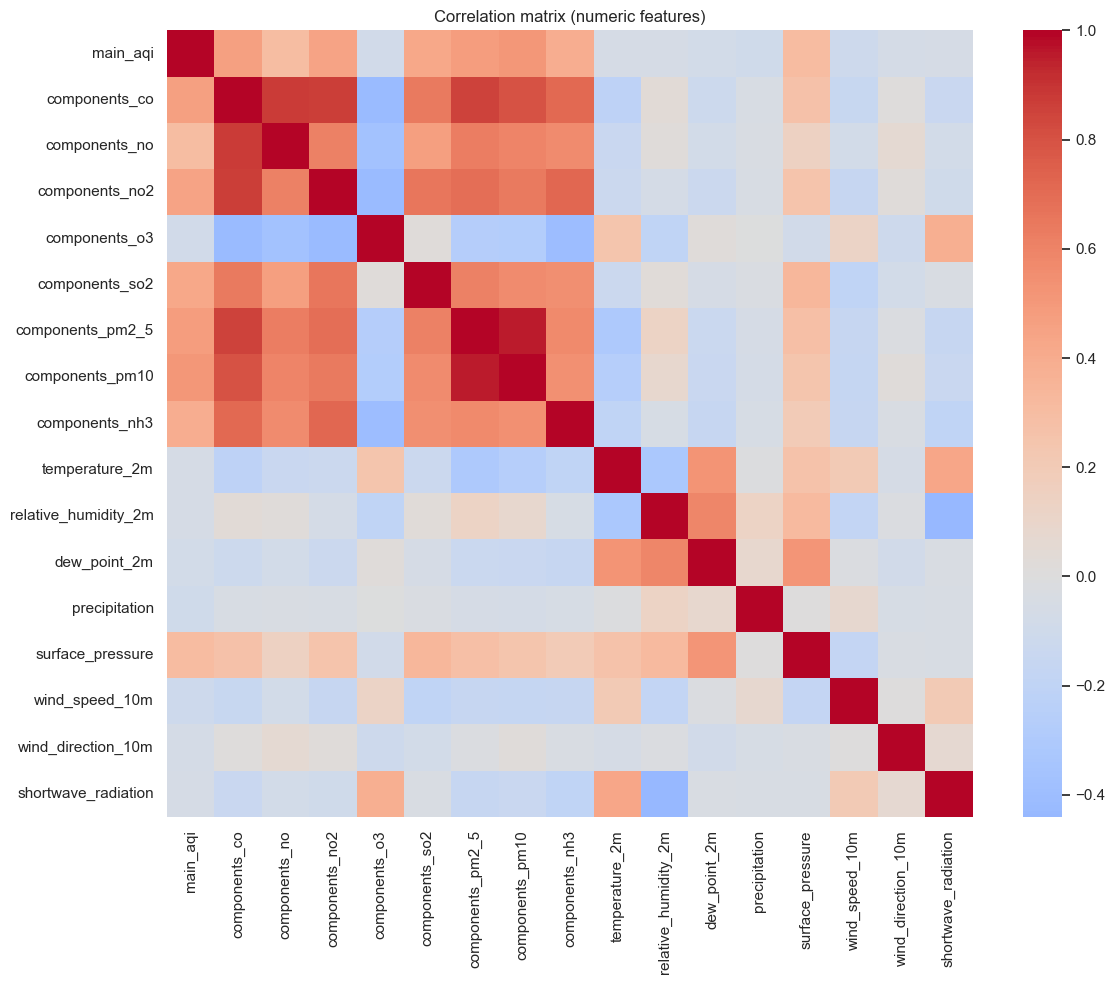

In [16]:
# Correlation heatmap
corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation matrix (numeric features)')
plt.tight_layout()
plt.show()


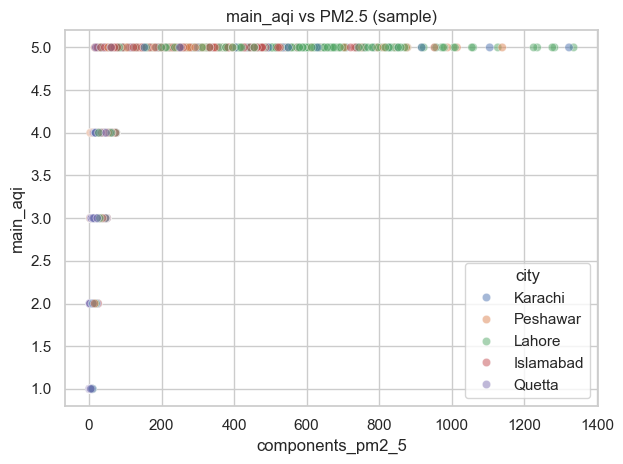

In [17]:
# Scatter relationship sample
sample_size = min(5000, len(df))
sample_df = df.sample(sample_size, random_state=42) if sample_size > 0 else df
sns.scatterplot(data=sample_df, x='components_pm2_5', y='main_aqi', hue='city', alpha=0.5)
plt.title('main_aqi vs PM2.5 (sample)')
plt.tight_layout()
plt.show()


## Preprocessing Rules (to be implemented in code later)
- Parse datetime as datetime and sort by city, datetime.
- Drop exact duplicate rows (same city + datetime).
- Handle nulls: if a row has nulls in critical features and nulls are rare → drop the row.
- For remaining missing values in numeric features → impute with median using SimpleImputer in the ML pipeline.
- Keep outliers; do not clip for now (they represent real pollution extremes).
- Do not fill missing timestamps; work with available rows only.
- Use city as a categorical feature (later one-hot encode or target encode).
- For classification, handle label imbalance with class_weight='balanced' in the classifier.
